In [91]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
import matplotlib.pyplot as plt
%matplotlib inline

# PROBLEM 1

In [85]:
df = pd.read_csv('Fever.csv')
df

A  B  Volunteer  Relief
0   1  1          1     2.4
1   1  1          2     2.7
2   1  1          3     2.3
3   1  1          4     2.5
4   1  2          1     4.6
5   1  2          2     4.2
6   1  2          3     4.9
7   1  2          4     4.7
8   1  3          1     4.8
9   1  3          2     4.5
10  1  3          3     4.4
11  1  3          4     4.6
12  2  1          1     5.8
13  2  1          2     5.2
14  2  1          3     5.5
15  2  1          4     5.3
16  2  2          1     8.9
17  2  2          2     9.1
18  2  2          3     8.7
19  2  2          4     9.0
20  2  3          1     9.1
21  2  3          2     9.3
22  2  3          3     8.7
23  2  3          4     9.4
24  3  1          1     6.1
25  3  1          2     5.7
26  3  1          3     5.9
27  3  1          4     6.2
28  3  2          1     9.9
29  3  2          2    10.5
30  3  2          3    10.6
31  3  2          4    10.1
32  3  3          1    13.5
33  3  3          2    13.0
34  3  3          3    13.3
35  3  3          4    13.2

In [86]:
df.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [87]:
df.shape

(36, 4)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [89]:
df.describe()

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

In [90]:
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

# 1.Formulating Null and alternate hypothesis for Variables 'A' & 'B'

In [9]:
#null hypothesis would be that,(H0) mean Relief due to various levels of ingredient 'A' was same.
#alternte hypotheis would be that,(H1) atleast one mean Relief due to various levels of ingredient 'A' was different.

In [114]:
#null hypothesis would be that,(H0) mean Relief due to various levels of ingredient 'B' was same.
#alternte hypotheis would be that,(H1) atleast one mean Relief due to various levels of ingredient 'B' was different.

# 2.One way ANOVA for variable 'A' wrt Relief

In [32]:
formula = 'Relief ~ C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [191]:
#since p value is less than alpha(0.05), we reject the null hypothesis.

# 3.One way ANOVA for variable 'B' wrt Relief

In [33]:
formula = 'Relief ~ C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


In [192]:
#since p value is less than alpha(0.05), we reject the null hypothesis

# 4.Interaction plots and graphs

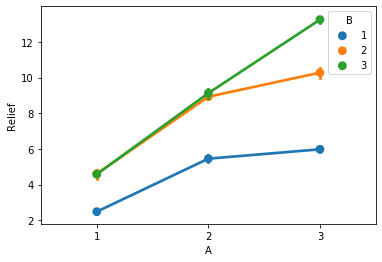

<Figure size 432x288 with 0 Axes>

In [34]:
sns.pointplot(x = 'A', y = 'Relief', hue='B',data=df)
plt.show()
plt.savefig('main_interaction_plot.jpg')

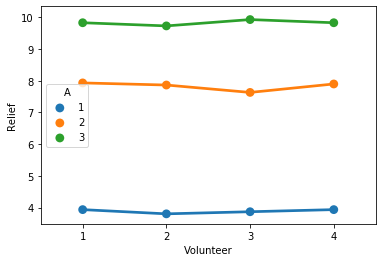

<Figure size 432x288 with 0 Axes>

In [35]:
sns.pointplot(x = 'Volunteer', y = 'Relief', hue='A',data=df, ci = None)
plt.show()
plt.savefig('Relief on Volunteers by Ingedient A.jpg')

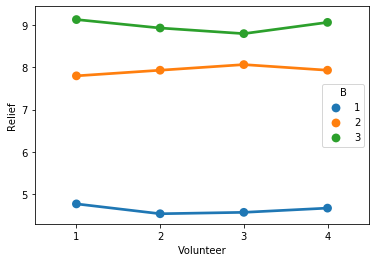

<Figure size 432x288 with 0 Axes>

In [36]:
sns.pointplot(x = 'Volunteer', y = 'Relief', hue='B',data=df, ci=None )
plt.show()
plt.savefig('Relief on Volunteers by Ingedient B.jpg')


# 5.Two way ANOVA for variables 'A' & 'B' wrt Relief 

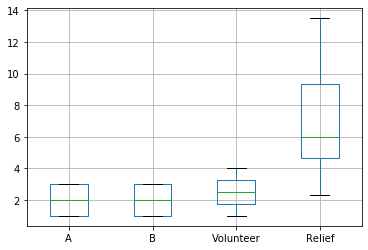

In [37]:
df.boxplot()

In [106]:
# we can see that there is no presence of outliers in the given dataset so we can go ahead with the 2 way ANOVA

In [38]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


In [116]:
# we can see that P value is less than alpha(0.05) for both A & B, we reject the null hypothesis.

In [39]:
from scipy.stats import shapiro
stat, p = shapiro(df['Relief'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.928, p=0.022


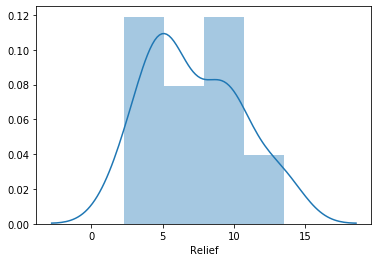

In [40]:
sns.distplot(df['Relief'])

In [ ]:
# Relief is not normally distrubuted so Ideally we should not go with ANOVA. 

# PROBLEM 2

In [63]:
data_df = pd.read_csv('Education - Post 12th Standard-1.csv')
data_df.head(10)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   
5             Albertson College   587     479     158         38         62   
6       Albertus Magnus College   353     340     103         17         45   
7                Albion College  1899    1720     489         37         68   
8              Albright College  1038     839     227         30         63   
9     Alderson-Broaddus College   582     498     172         21         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   
5          678           41     13500        3335    500       675   67   
6          416          230     13290        5720    500      1500   90   
7         1594           32     13868        4826    450       850   89   
8          973          306     15595        4400    300       500   79   
9          799           78     10468        3380    660      1800   40   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15  
5        73        9.4           11    9727         55  
6        93       11.5           26    8861         63  
7       100       13.7           37   11487         73  
8        84       11.3           23   11644         80  
9        41       11.5           15    8991         52

In [64]:
data_df.shape

(777, 18)

In [65]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [66]:
data_df.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [67]:
data_df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [68]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data_df[dups]


Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

# 6.Univariate Analysis

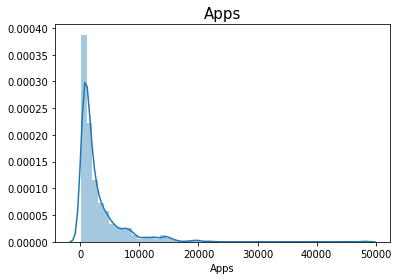

In [69]:
a = sns.distplot(data_df['Apps'] )
a.set_title("Apps",fontsize=15)
plt.savefig('apps_histogram.jpg')

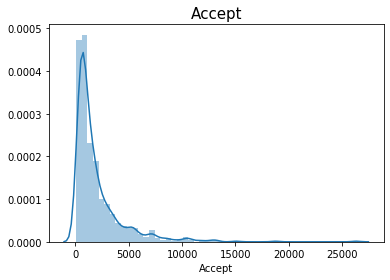

In [70]:
b = sns.distplot(data_df['Accept'] )
b.set_title("Accept",fontsize=15)
plt.savefig('Accept_histogram.jpg')

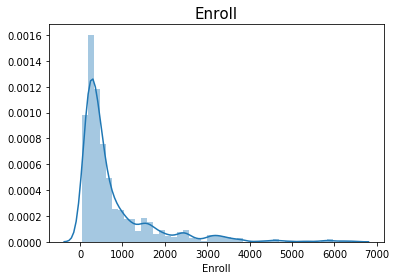

In [25]:
c = sns.distplot(data_df['Enroll'] )
c.set_title("Enroll",fontsize=15)
plt.savefig('Enroll_histogram.jpg')

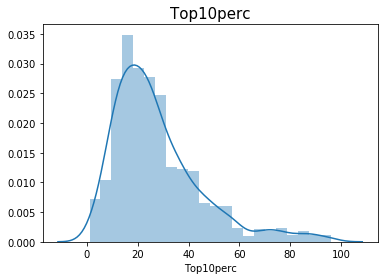

In [26]:
d = sns.distplot(data_df['Top10perc'] )
d.set_title("Top10perc",fontsize=15)
plt.savefig('Top10perc_histogram.jpg')

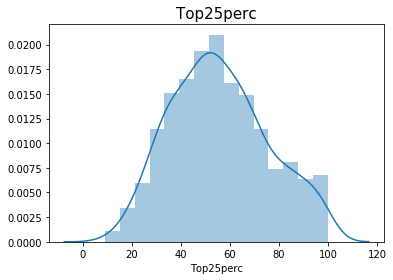

In [27]:
e = sns.distplot(data_df['Top25perc'] )
e.set_title("Top25perc",fontsize=15)
plt.savefig('Top25perc_histogram.jpg')

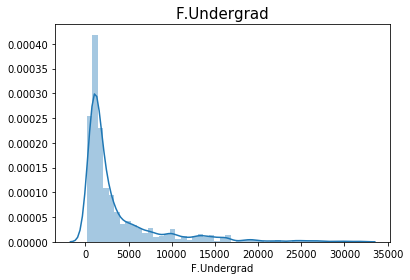

In [28]:
f = sns.distplot(data_df['F.Undergrad'] )
f.set_title("F.Undergrad",fontsize=15)
plt.savefig('F.Undergrad_histogram.jpg')

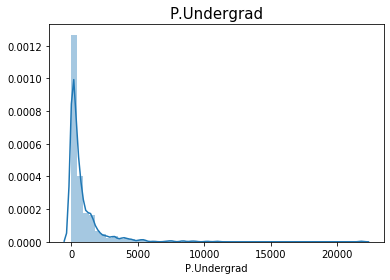

In [29]:
g = sns.distplot(data_df['P.Undergrad'] )
g.set_title("P.Undergrad",fontsize=15)
plt.savefig('P.Undergrad_histogram.jpg')

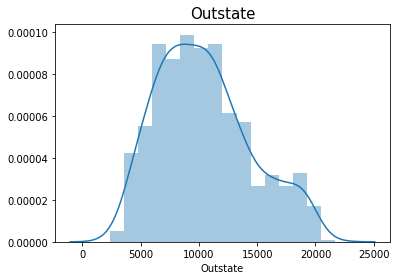

In [30]:
h = sns.distplot(data_df['Outstate'] )
h.set_title("Outstate",fontsize=15)
plt.savefig('Outstate_histogram.jpg')

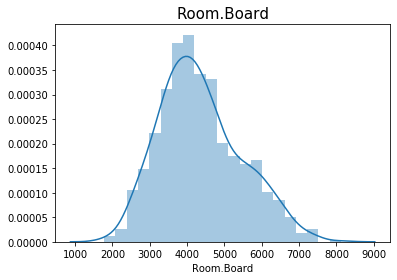

In [31]:
i = sns.distplot(data_df['Room.Board'] )
i.set_title("Room.Board",fontsize=15)
plt.savefig('Room.Board_histogram.jpg')

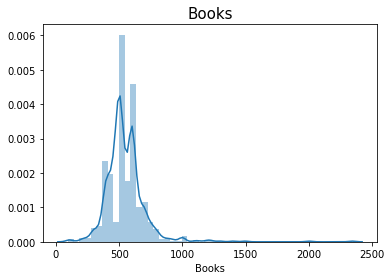

In [32]:
j = sns.distplot(data_df['Books'] )
j.set_title("Books",fontsize=15)
plt.savefig('Books_histogram.jpg')

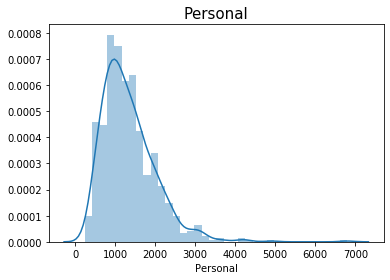

In [33]:
k = sns.distplot(data_df['Personal'] )
k.set_title("Personal",fontsize=15)
plt.savefig('Personal_histogram.jpg')

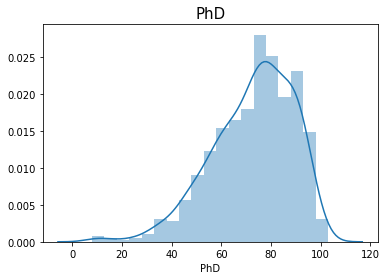

In [34]:
l = sns.distplot(data_df['PhD'] )
l.set_title("PhD",fontsize=15)
plt.savefig('PhD_histogram.jpg')

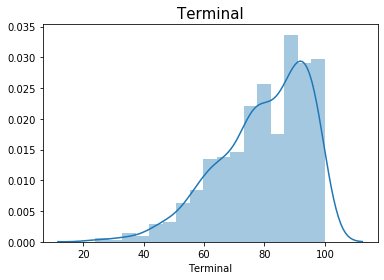

In [35]:
m = sns.distplot(data_df['Terminal'] )
m.set_title("Terminal",fontsize=15)
plt.savefig('Terminal_histogram.jpg')

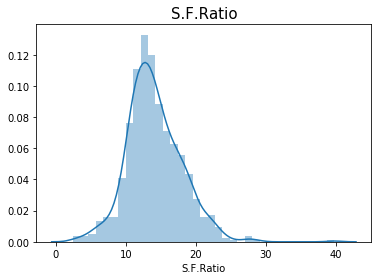

In [36]:
n = sns.distplot(data_df['S.F.Ratio'] )
n.set_title("S.F.Ratio",fontsize=15)
plt.savefig('S.F.Ratio_histogram.jpg')

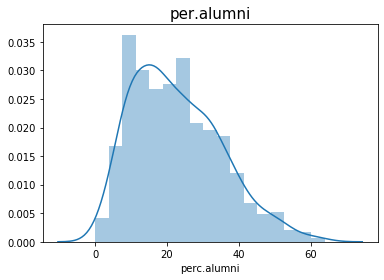

In [37]:
o = sns.distplot(data_df['perc.alumni'] )
o.set_title("per.alumni",fontsize=15)
plt.savefig('per.alumni.jpg')

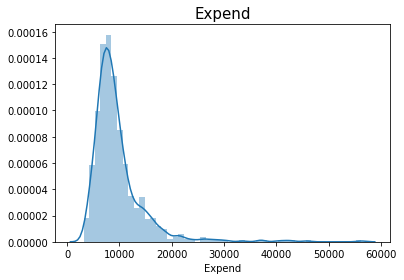

In [38]:
p = sns.distplot(data_df['Expend'] )
p.set_title("Expend",fontsize=15)
plt.savefig('Expend_histogram.jpg')

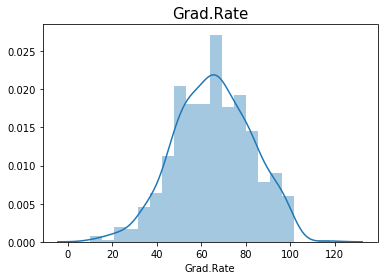

In [39]:
q = sns.distplot(data_df['Grad.Rate'] )
q.set_title("Grad.Rate",fontsize=15)
plt.savefig('Grad.rate_histogram.jpg')

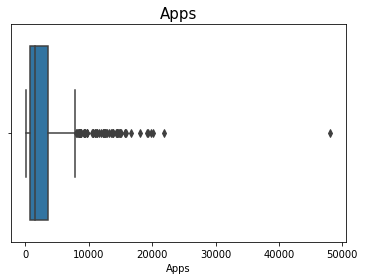

In [40]:
a = sns.boxplot(data_df['Apps'] , orient = "h")
a.set_title("Apps",fontsize=15)
plt.savefig('Apps_boxplot.jpg')

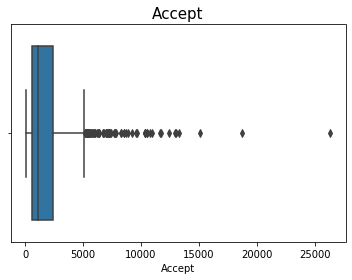

In [41]:
b = sns.boxplot(data_df['Accept'] , orient = "h")
b.set_title("Accept",fontsize=15)
plt.savefig('Accept_boxplot.jpg')

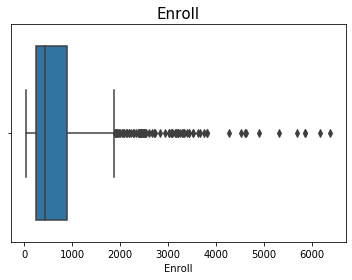

In [42]:
c = sns.boxplot(data_df['Enroll'] , orient = "h")
c.set_title("Enroll",fontsize=15)
plt.savefig('Enroll.jpg')

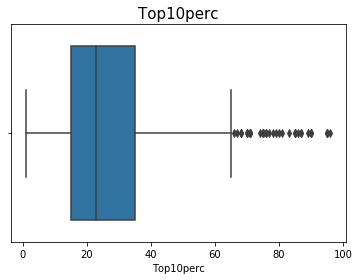

In [43]:
d = sns.boxplot(data_df['Top10perc'] , orient = "h")
d.set_title("Top10perc",fontsize=15)
plt.savefig('Top10perc_boxplot.jpg')

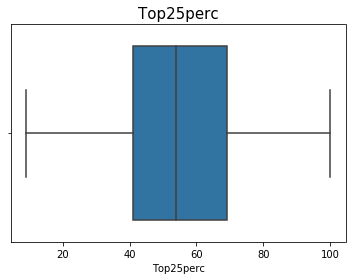

In [44]:
e = sns.boxplot(data_df['Top25perc'] , orient = "h")
e.set_title("Top25perc",fontsize=15)
plt.savefig('Top25perc_boxplot.jpg')

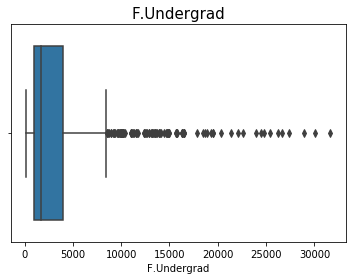

In [45]:
f = sns.boxplot(data_df['F.Undergrad'] , orient = "h")
f.set_title("F.Undergrad",fontsize=15)
plt.savefig('F.Undergrad_boxplot.jpg')

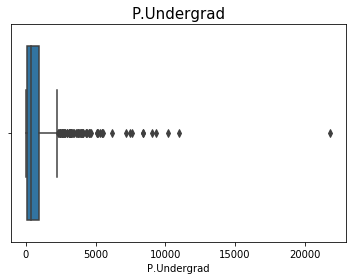

In [46]:
g = sns.boxplot(data_df['P.Undergrad'] , orient = "h")
g.set_title("P.Undergrad",fontsize=15)
plt.savefig('P.Undergrad_boxplot.jpg')

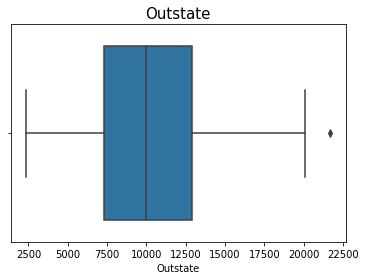

In [47]:
h = sns.boxplot(data_df['Outstate'] , orient = "h")
h.set_title("Outstate",fontsize=15)
plt.savefig('Outstate_boxplot.jpg')

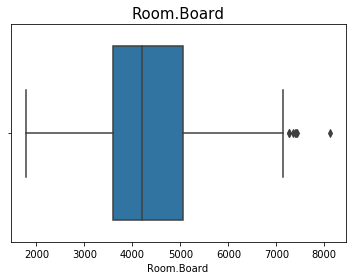

In [48]:
i = sns.boxplot(data_df['Room.Board'] , orient = "h")
i.set_title("Room.Board",fontsize=15)
plt.savefig('Room.Board_boxplot.jpg')

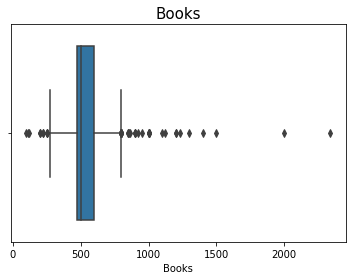

In [49]:
j = sns.boxplot(data_df['Books'] , orient = "h")
j.set_title("Books",fontsize=15)
plt.savefig('Books_boxplot.jpg')

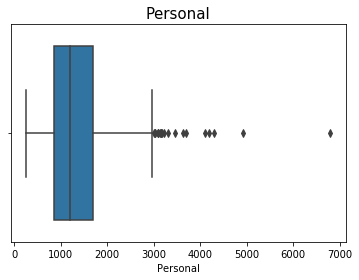

In [50]:
k = sns.boxplot(data_df['Personal'] , orient = "h")
k.set_title("Personal",fontsize=15)
plt.savefig('Personal_boxplot.jpg')

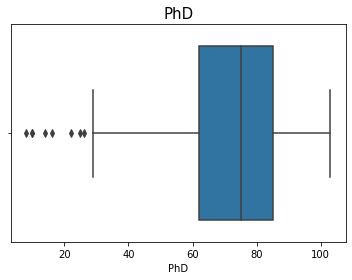

In [51]:
l = sns.boxplot(data_df['PhD'] , orient = "h")
l.set_title("PhD",fontsize=15)
plt.savefig('PhD_boxplot.jpg')

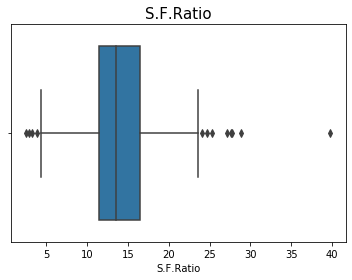

In [52]:
m = sns.boxplot(data_df['S.F.Ratio'] , orient = "h")
m.set_title("S.F.Ratio",fontsize=15)
plt.savefig('S.F.Ratio_boxplot.jpg')

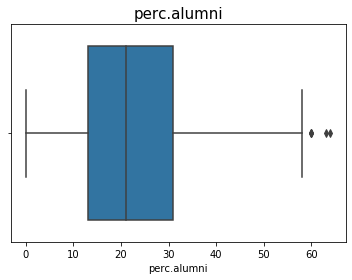

In [53]:
n = sns.boxplot(data_df['perc.alumni'] , orient = "h")
n.set_title("perc.alumni",fontsize=15)
plt.savefig('perc.alumni_boxplot.jpg')

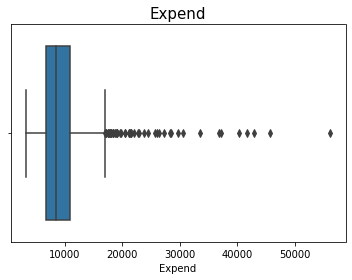

In [54]:
o = sns.boxplot(data_df['Expend'] , orient = "h")
o.set_title("Expend",fontsize=15)
plt.savefig('Expend_boxplot.jpg')

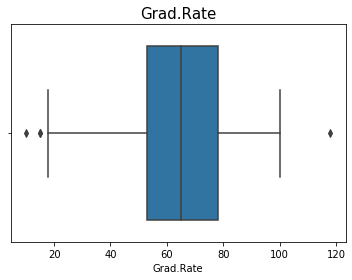

In [55]:
p = sns.boxplot(data_df['Grad.Rate'] , orient = "h")
p.set_title("Grad.Rate",fontsize=15)
plt.savefig('Grad.Rate_boxplot.jpg')

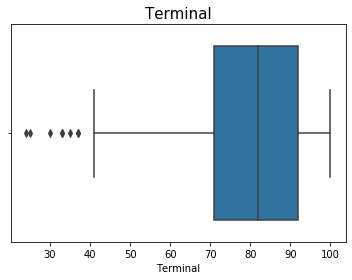

In [56]:
q = sns.boxplot(data_df['Terminal'] , orient = "h")
q.set_title("Terminal",fontsize=15)
plt.savefig('Terminal_boxplot.jpg')

# 7.Multi-Variate Analysis

In [71]:
data_df.cov()

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room.Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S.F.Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc.alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad.Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S.F.Ratio   perc.alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

In [72]:
data_df.corr(method='pearson')

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

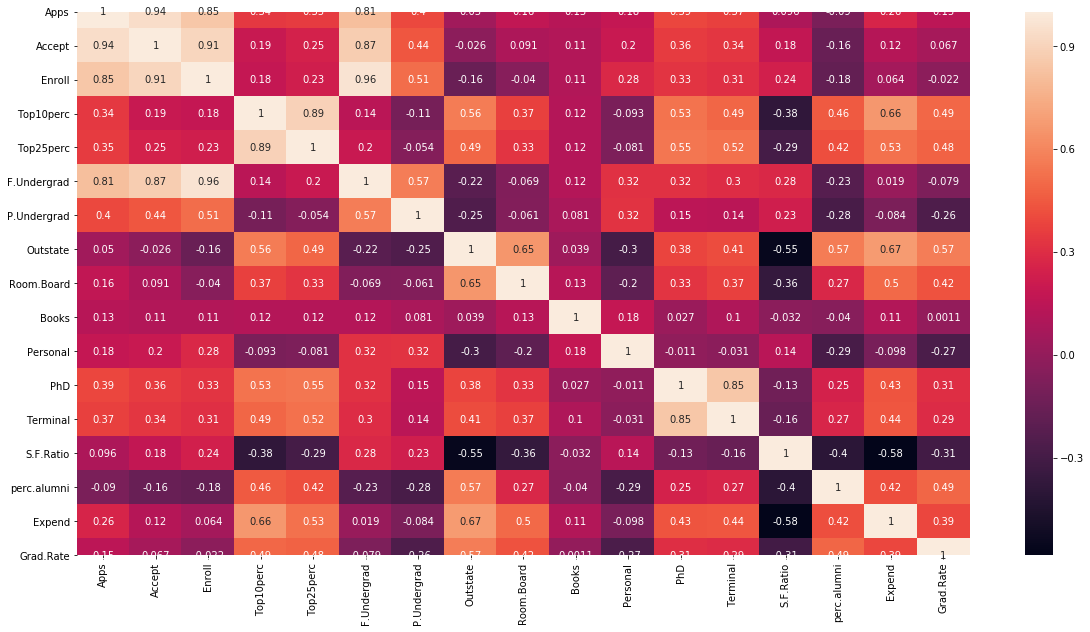

In [104]:
plt.subplots(figsize=(20,10))
sns.heatmap(data_df.corr(), annot=True)
plt.savefig('MultiVariate_HeatMapt.jpg')

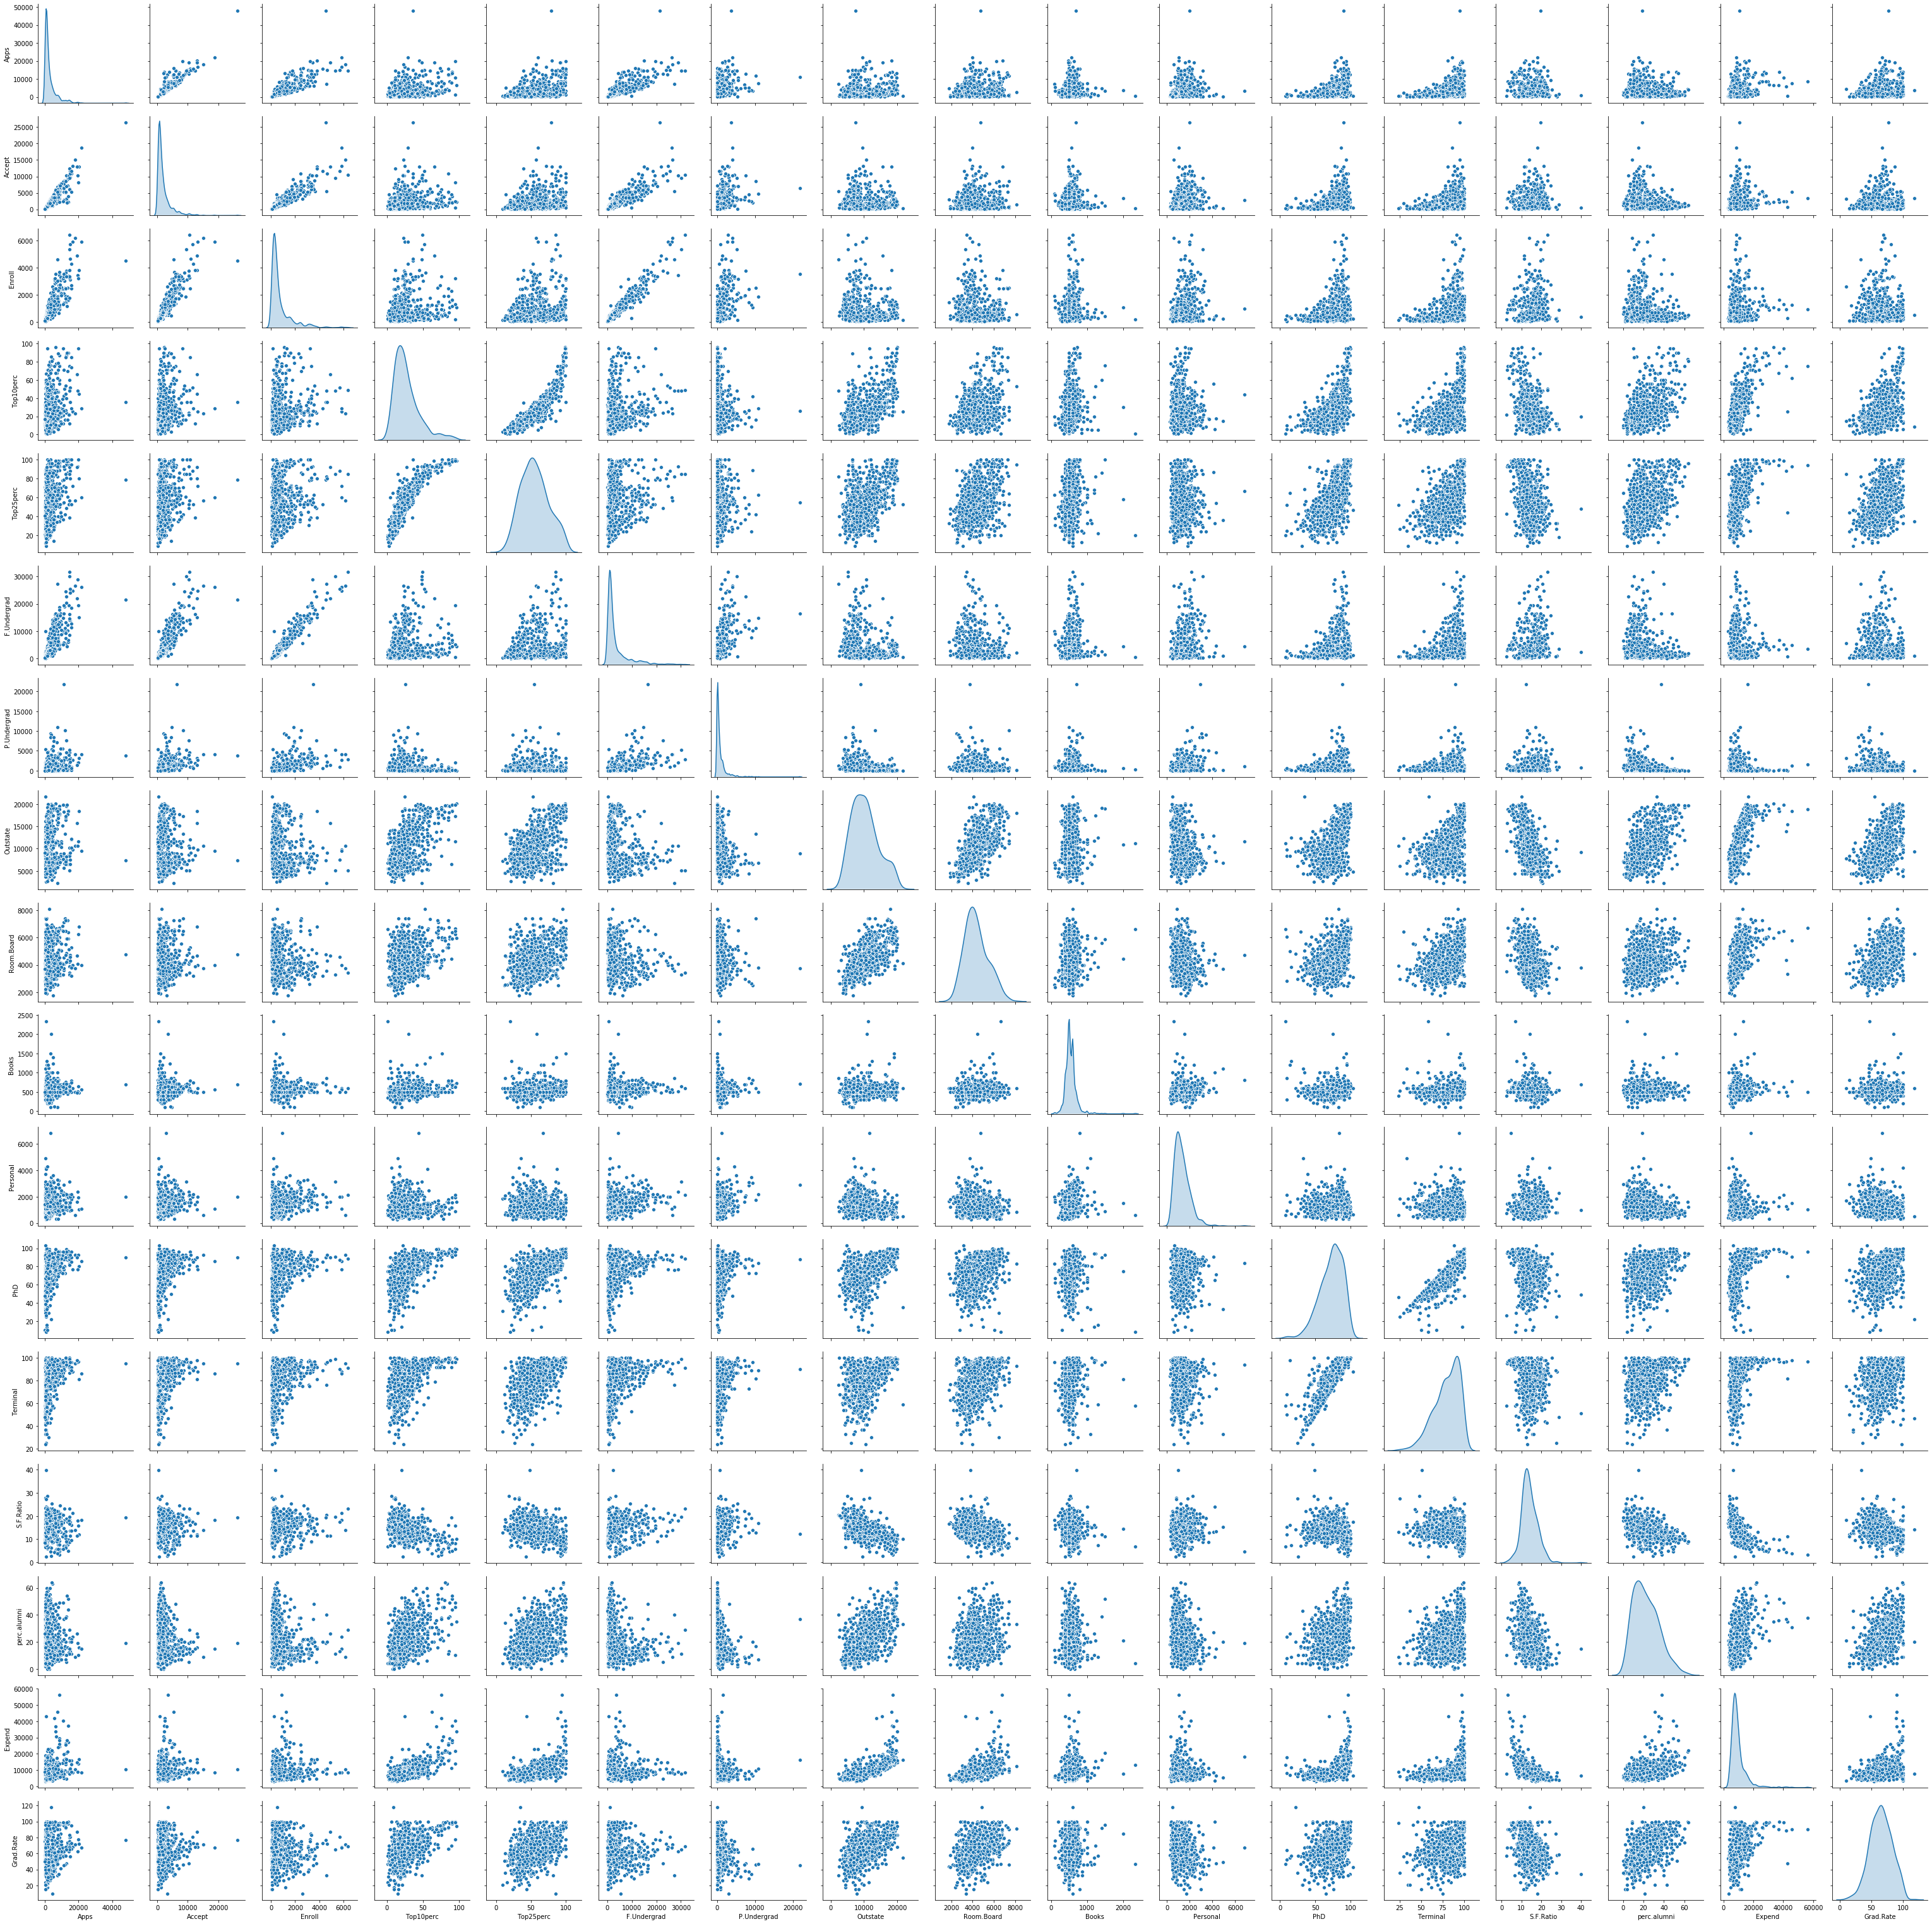

In [106]:
sns.pairplot(data_df,diag_kind='kde')
plt.savefig('MultiVariate_PairPlot.jpg')

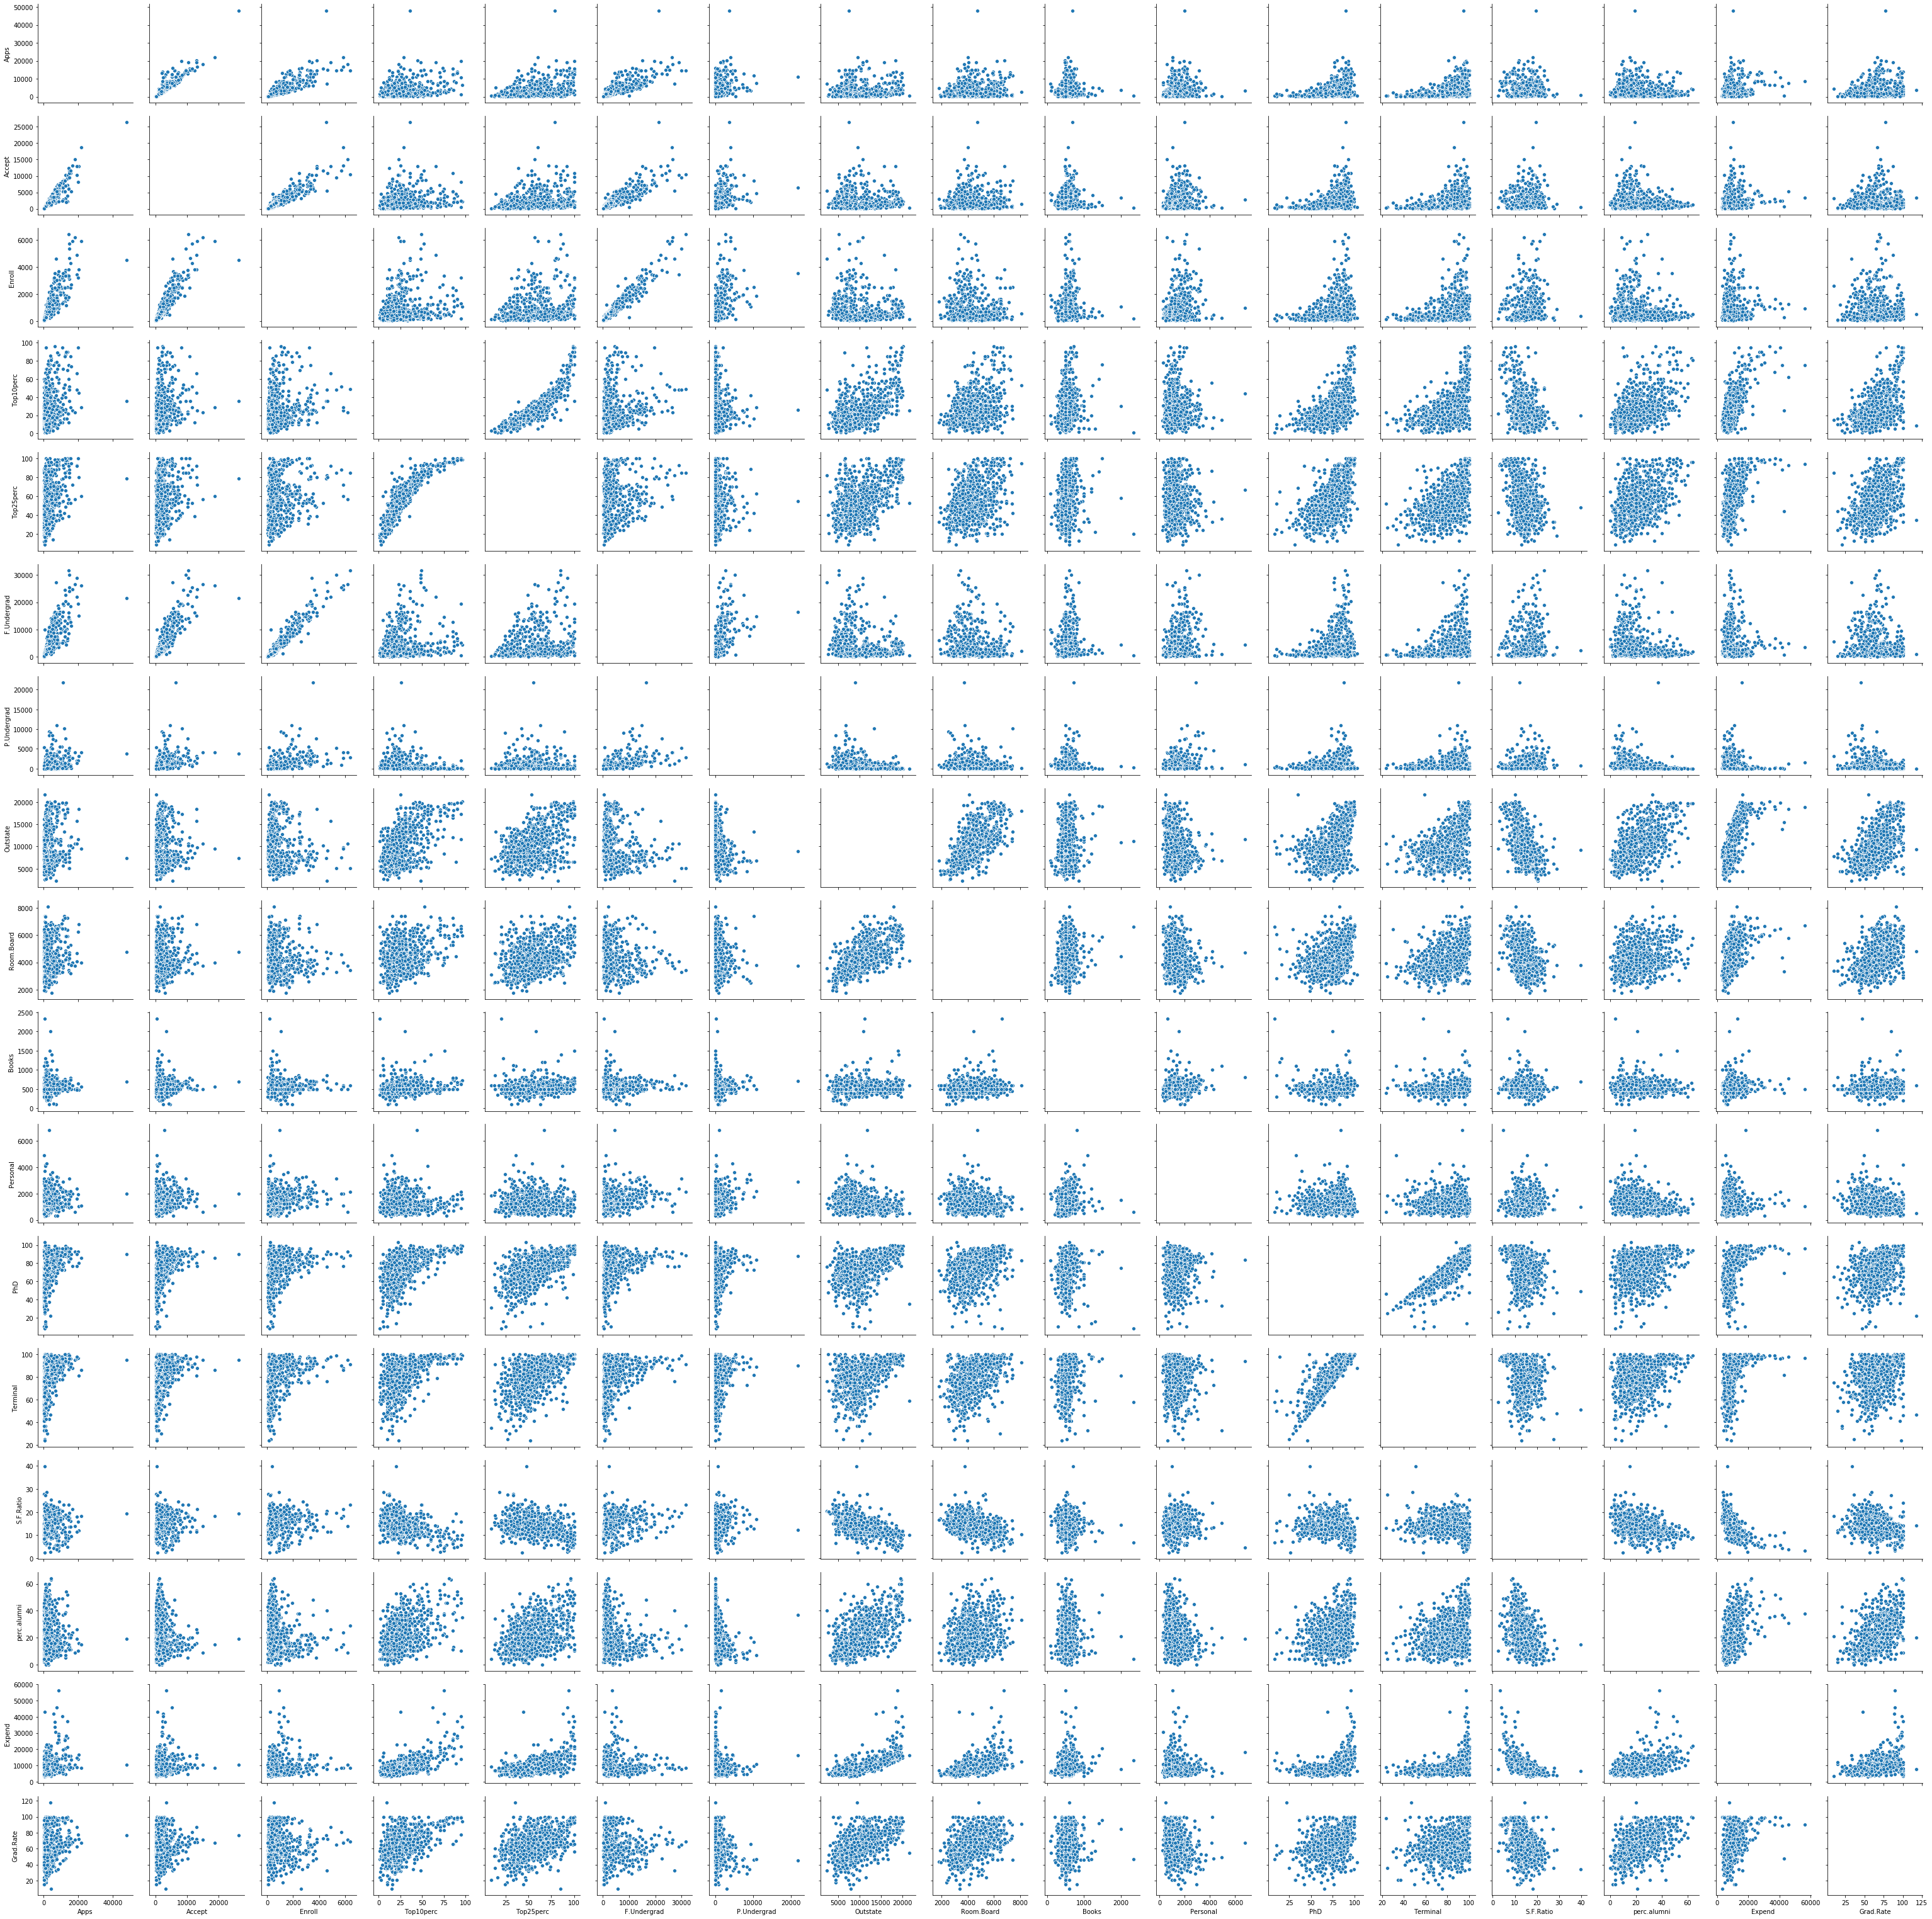

In [107]:
sns.pairplot(data_df,diag_kind='reg')
plt.savefig('MultiVariate_PairPlot_RegressionType.jpg')

# 8.Check for outliers before and after scaling:

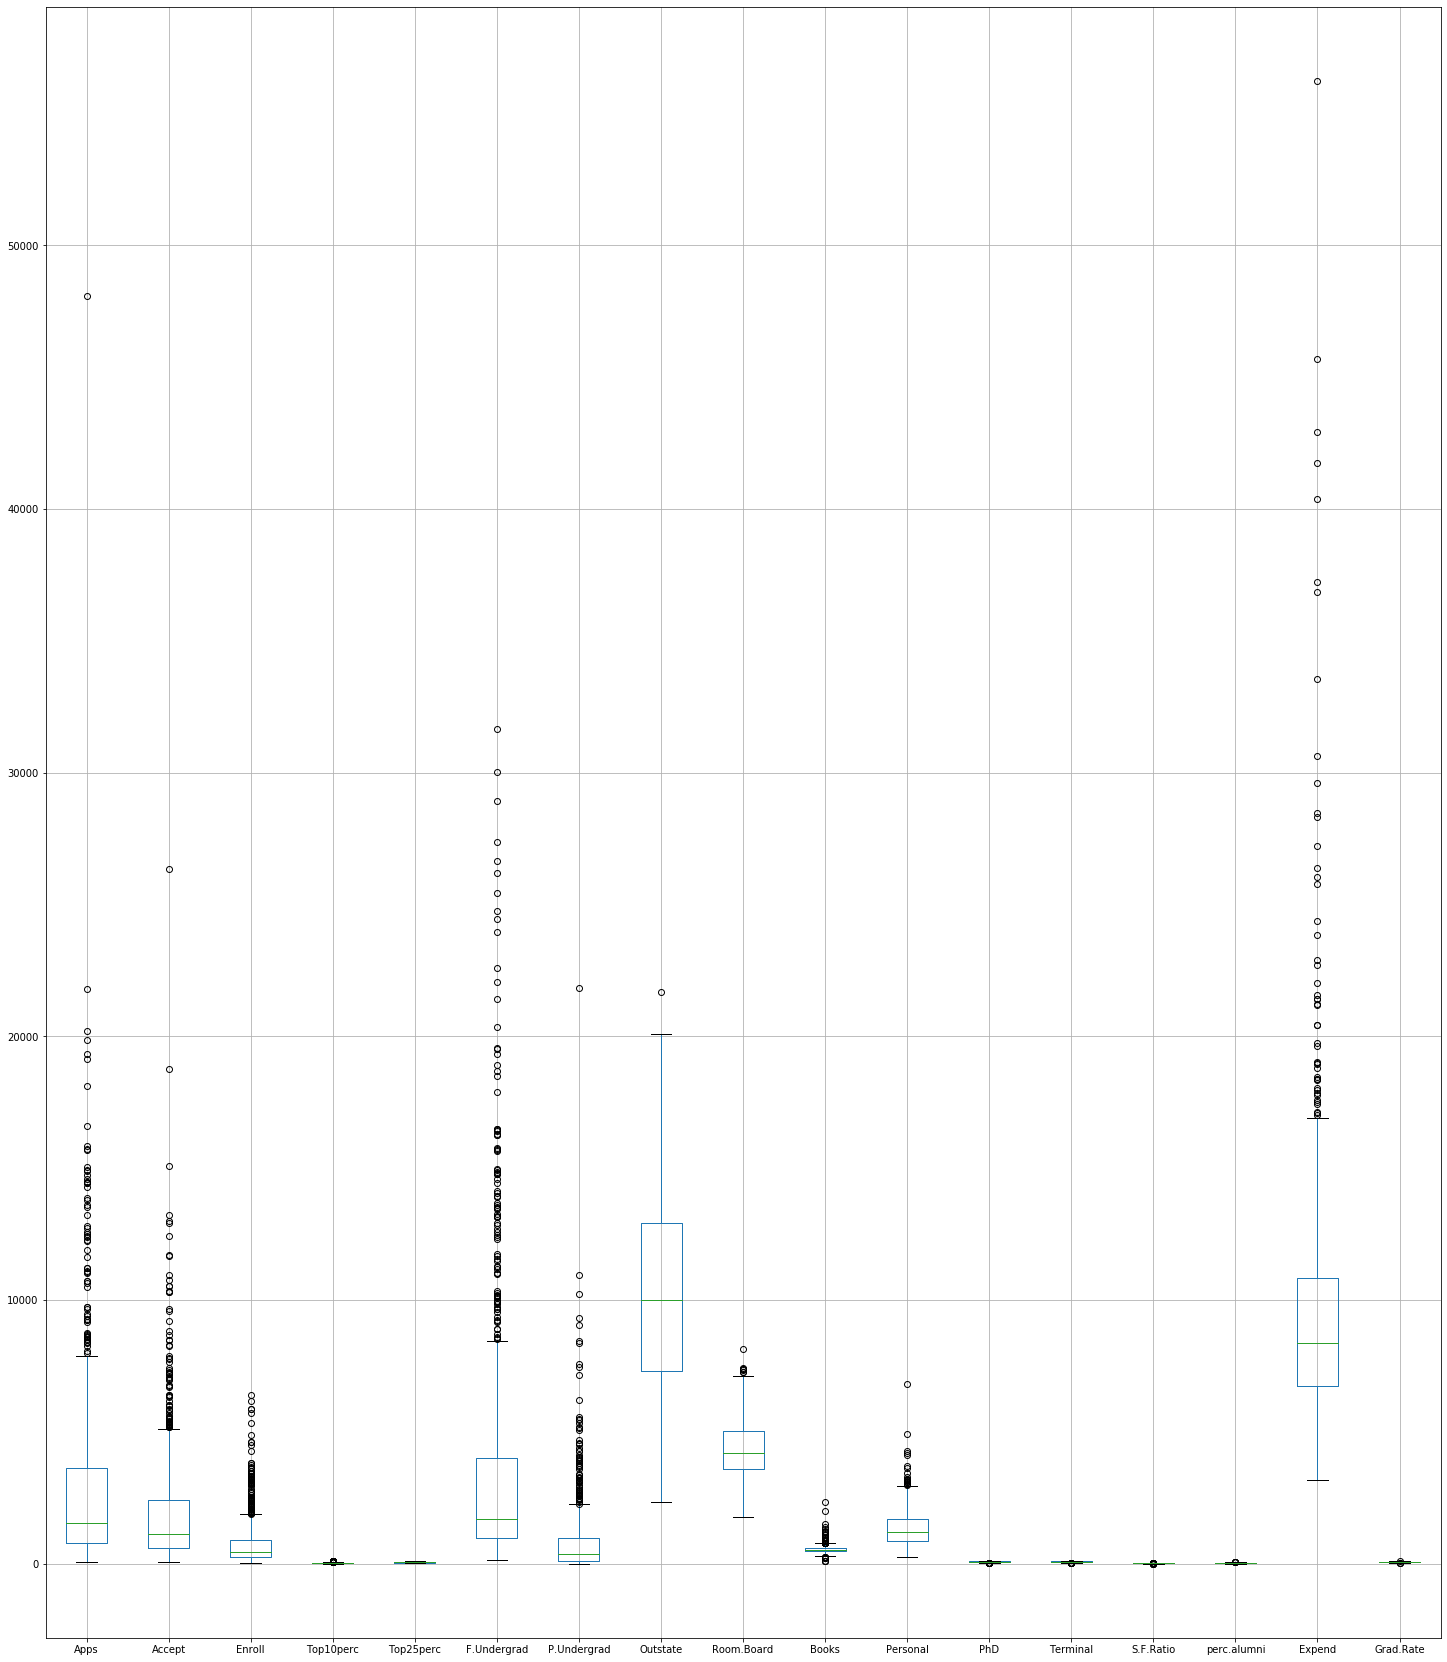

In [73]:
plt.subplots(figsize=(25,30))
data_df.boxplot(figsize=(25,20))
plt.savefig('Outliers_before _Scaling.jpg')

In [74]:
data_df=data_df.drop(['Names'],axis=1)

In [ ]:
## we will just do scaling to check for outliers. The scaling should ideally be done once we do the oulier treatment, nut if we do that the question will be pointless. 

In [75]:
data_df.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [76]:
from scipy.stats import zscore
data_scaled_new=data_df.apply(zscore)
data_scaled_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

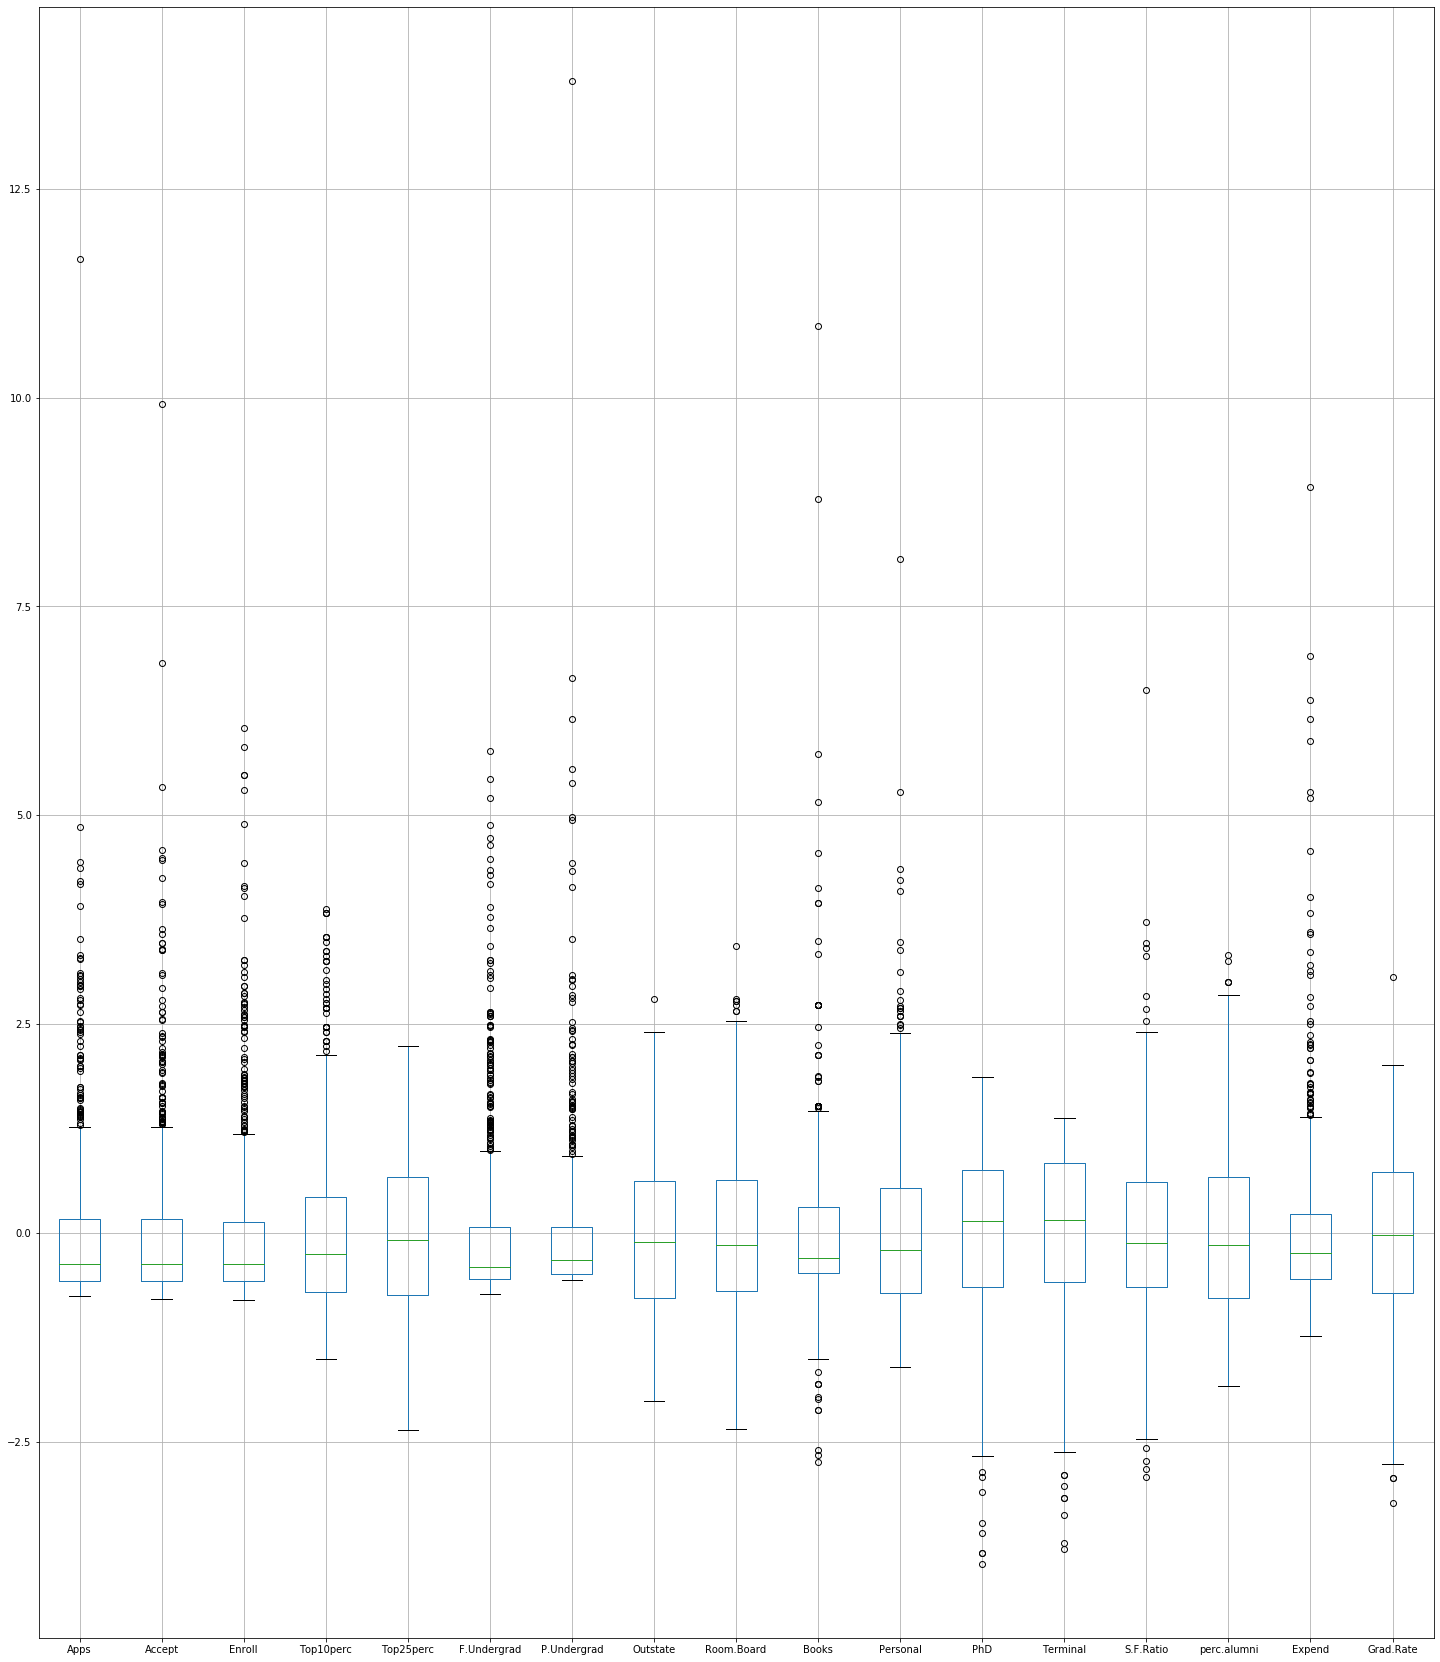

In [65]:
plt.subplots(figsize=(25,30))
data_scaled_new.boxplot(figsize=(25,20))
plt.savefig('Outliers_After_Scaling.jpg')

# 9.OUTLIER TREATMENT 


In [77]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [78]:
#1)Apps
lrapps,urapps=remove_outlier(data_df['Apps'])
data_df['Apps']=np.where(data_df['Apps']>urapps,urapps,data_df['Apps'])
data_df['Apps']=np.where(data_df['Apps']<lrapps,lrapps,data_df['Apps'])

#2)Accept
lraccept,uraccept=remove_outlier(data_df['Accept'])
data_df['Accept']=np.where(data_df['Accept']>uraccept,uraccept,data_df['Accept'])
data_df['Accept']=np.where(data_df['Accept']<lraccept,lraccept,data_df['Accept'])

#3)Enroll
lrenroll,urenroll=remove_outlier(data_df['Enroll'])
data_df['Enroll']=np.where(data_df['Enroll']>urenroll,urenroll,data_df['Enroll'])
data_df['Enroll']=np.where(data_df['Enroll']<lrenroll,lrenroll,data_df['Enroll'])

#4)top10perc
lrtop10perc,urtop10perc=remove_outlier(data_df['Top10perc'])
data_df['Top10perc']=np.where(data_df['Top10perc']>urtop10perc,urtop10perc,data_df['Top10perc'])
data_df['Top10perc']=np.where(data_df['Top10perc']<lrtop10perc,lrtop10perc,data_df['Top10perc'])

#5)top25perc
lrtop25perc,urtop25perc=remove_outlier(data_df['Top25perc'])
data_df['Top25perc']=np.where(data_df['Top25perc']>urtop25perc,urtop25perc,data_df['Top25perc'])
data_df['Top25perc']=np.where(data_df['Top25perc']<lrtop25perc,lrtop25perc,data_df['Top25perc'])

#6)F.Undergrad
lrf_undergrad,urf_undergrad=remove_outlier(data_df['F.Undergrad'])
data_df['F.Undergrad']=np.where(data_df['F.Undergrad']>urf_undergrad,urf_undergrad,data_df['F.Undergrad'])
data_df['F.Undergrad']=np.where(data_df['F.Undergrad']<lrf_undergrad,lrf_undergrad,data_df['F.Undergrad'])

#7)P.Undergrad
lrp_undergrad,urp_undergrad=remove_outlier(data_df['P.Undergrad'])
data_df['P.Undergrad']=np.where(data_df['P.Undergrad']>urp_undergrad,urp_undergrad,data_df['P.Undergrad'])
data_df['P.Undergrad']=np.where(data_df['P.Undergrad']<lrp_undergrad,lrp_undergrad,data_df['P.Undergrad'])

#8)Outstate
lroutstate,uroutstate=remove_outlier(data_df['Outstate'])
data_df['Outstate']=np.where(data_df['Outstate']>uroutstate,uroutstate,data_df['Outstate'])
data_df['Outstate']=np.where(data_df['Outstate']<lroutstate,lroutstate,data_df['Outstate'])

#9)Room.Board
lrroom_board,urroom_board=remove_outlier(data_df['Room.Board'])
data_df['Room.Board']=np.where(data_df['F.Undergrad']>urroom_board,urroom_board,data_df['Room.Board'])
data_df['Room.Board']=np.where(data_df['F.Undergrad']<lrroom_board,lrroom_board,data_df['Room.Board'])

#10)Books
lrbooks,urbooks=remove_outlier(data_df['Books'])
data_df['Books']=np.where(data_df['Books']>urbooks,urbooks,data_df['Books'])
data_df['Books']=np.where(data_df['Books']<lrbooks,lrbooks,data_df['Books'])

#11)Personal
lrpersonal,urpersonal=remove_outlier(data_df['Personal'])
data_df['Personal']=np.where(data_df['Personal']>urpersonal,urpersonal,data_df['Personal'])
data_df['Personal']=np.where(data_df['Personal']<lrpersonal,lrpersonal,data_df['Personal'])

#12)PhD
lrphd,urphd=remove_outlier(data_df['PhD'])
data_df['PhD']=np.where(data_df['PhD']>urphd,urphd,data_df['PhD'])
data_df['PhD']=np.where(data_df['PhD']<lrphd,lrphd,data_df['PhD'])


#13)Terminal
lrterminal,urterminal=remove_outlier(data_df['Terminal'])
data_df['Terminal']=np.where(data_df['Terminal']>urterminal,urterminal,data_df['Terminal'])
data_df['Terminal']=np.where(data_df['Terminal']<lrterminal,lrterminal,data_df['Terminal'])


#14)S.F.Ratio
lrsfratio,ursfratio=remove_outlier(data_df['S.F.Ratio'])
data_df['S.F.Ratio']=np.where(data_df['S.F.Ratio']>ursfratio,ursfratio,data_df['S.F.Ratio'])
data_df['S.F.Ratio']=np.where(data_df['S.F.Ratio']<lrsfratio,lrsfratio,data_df['S.F.Ratio'])

#15)perc.alumni
lrperc_alumni,urperc_alumni=remove_outlier(data_df['perc.alumni'])
data_df['perc.alumni']=np.where(data_df['perc.alumni']>urperc_alumni,urperc_alumni,data_df['perc.alumni'])
data_df['perc.alumni']=np.where(data_df['perc.alumni']<lrperc_alumni,lrperc_alumni,data_df['perc.alumni'])

#16)Expend
lrexpend,urexpend=remove_outlier(data_df['Expend'])
data_df['Expend']=np.where(data_df['Expend']>urexpend,urexpend,data_df['Expend'])
data_df['Expend']=np.where(data_df['Expend']<lrexpend,lrexpend,data_df['Expend'])


#17)Grad.Rate
lrgrad_rate,urgrad_rate=remove_outlier(data_df['Grad.Rate'])
data_df['Grad.Rate']=np.where(data_df['Grad.Rate']>urgrad_rate,urgrad_rate,data_df['Grad.Rate'])
data_df['Grad.Rate']=np.where(data_df['Grad.Rate']<lrgrad_rate,lrgrad_rate,data_df['Grad.Rate'])

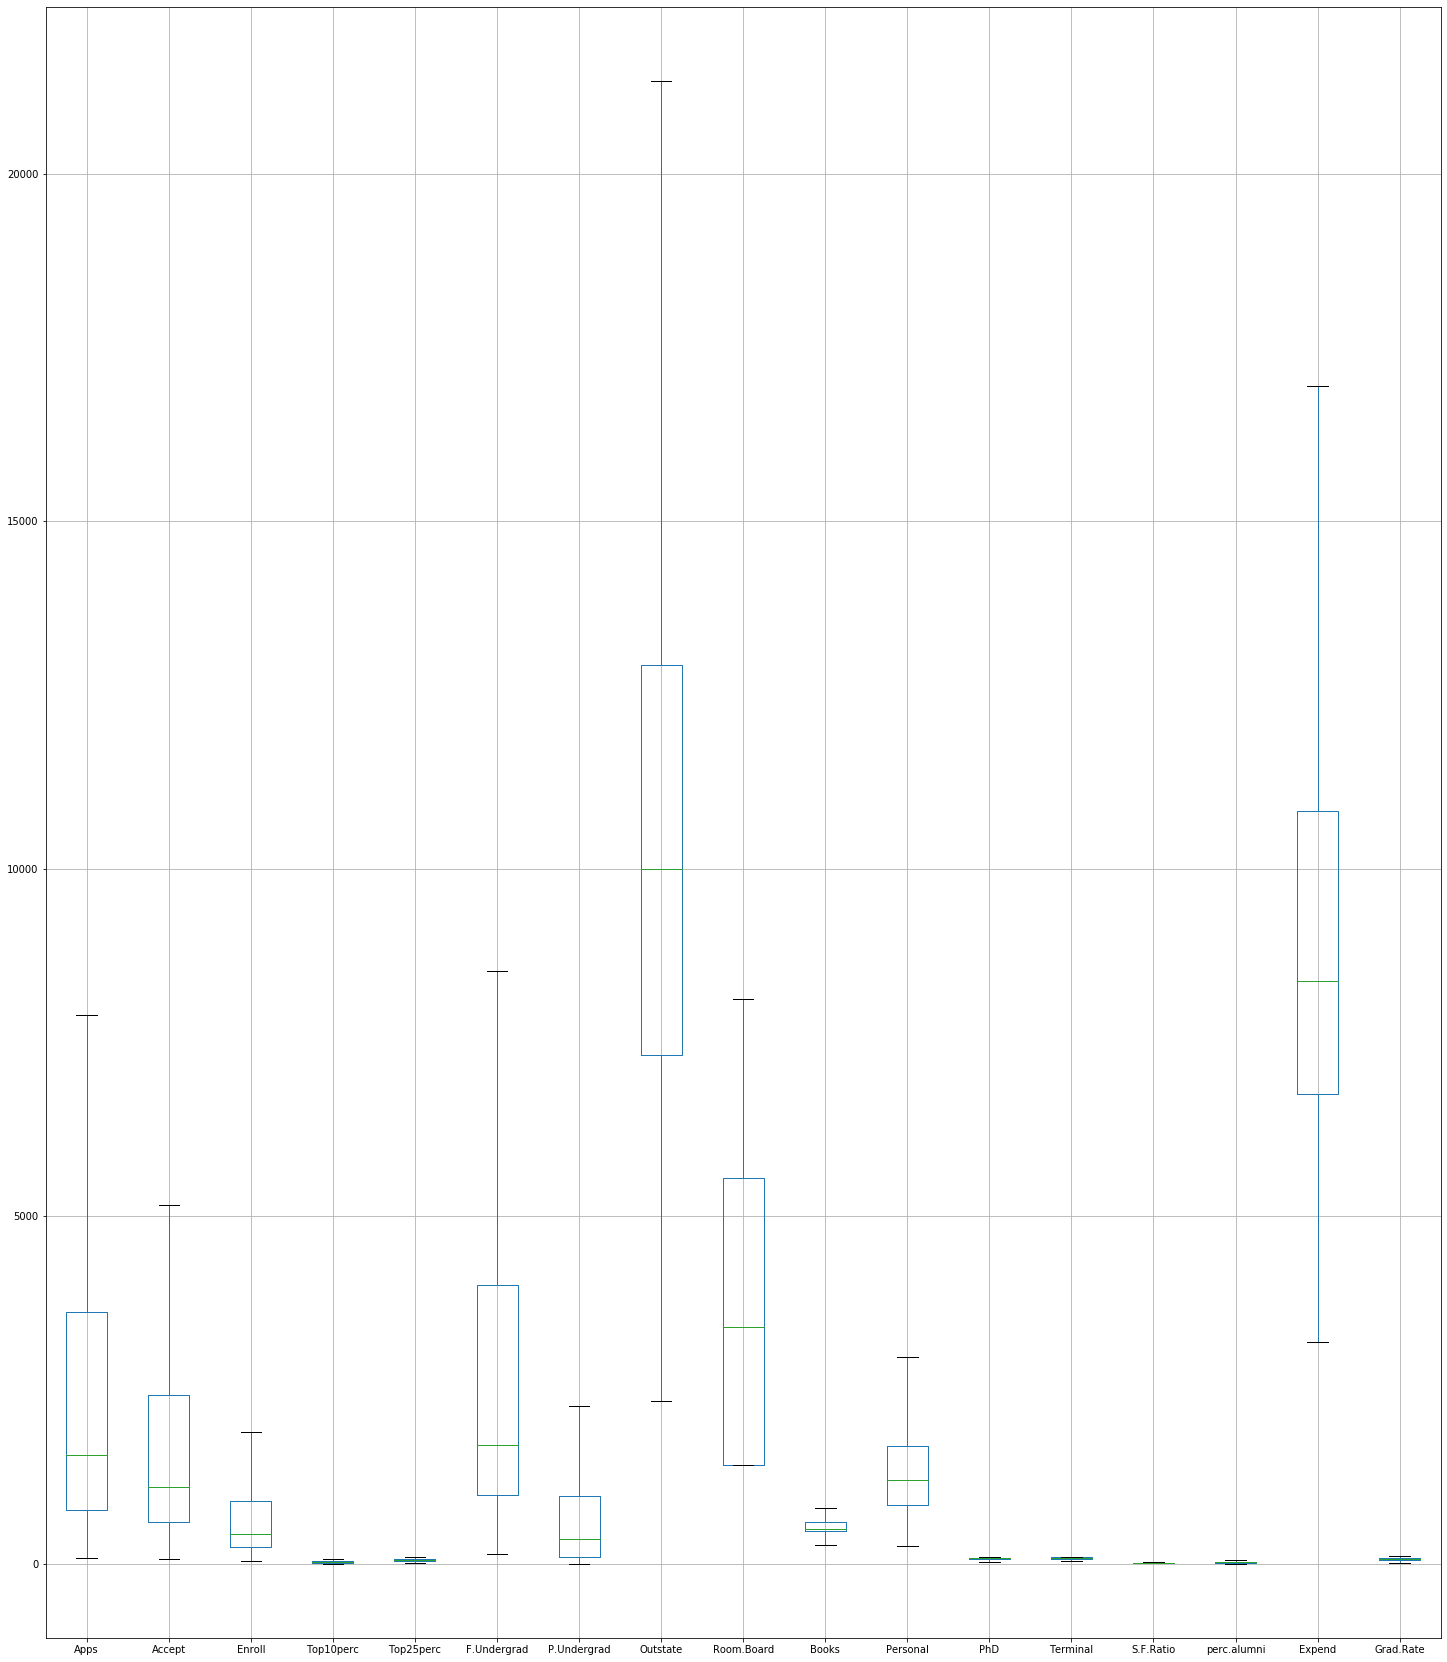

In [54]:
plt.subplots(figsize=(25,30))
data_df.boxplot(figsize=(25,20))
plt.savefig('Outliers_After_Treatment.jpg')

# 10.Scaling


In [79]:
from scipy.stats import zscore
data_new=data_df.apply(zscore)
data_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.141639 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.270614  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.985629 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954   -0.985629 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.985629  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

# 11.Generating a Covariance and Correlation matrix

In [80]:
#creating a covariance matrix
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   8.01069737e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   8.11232054e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
   8.06626077e-01  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [81]:
#correlation matrix on the scaled dataset
data_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.800039  0.810188  0.805588   0.245379   0.296293     0.816509   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.800039  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.810188  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655    0.805588  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.245379  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.296293  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166    0.816509  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216    0.545792  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.071703  0.005110 -0.325609  0.391321   
Room.Board      0.545792  0.071703    1.000000  0.243646  0.214761  0.449402   
Books           0.122529  0.005110    0.243646  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609    0.214761  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.449402  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.430057  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683    0.167410 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736   -0.129441 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.199034  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.130692 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.430057   0.167410    -0.129441  0.199034   0.130692  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

# 12.Generating Covariance Matrix, Eigen value and Eigen Vectors 

In [82]:
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   8.01069737e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   8.11232054e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
   8.06626077e-01  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [83]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [6.01235611 4.91186197 1.132018   0.88993722 0.83252826 0.71157746
 0.58350067 0.47015437 0.40398032 0.33371017 0.22688741 0.02168213
 0.03766068 0.15054062 0.1343966  0.09432479 0.07479044]
Eigen Vectors 
 %s [[ 3.69179555e-01  1.03112526e-01 -7.47323198e-02  2.14095184e-01
   1.68631431e-03 -1.92609872e-02  1.91044880e-02 -4.85558287e-02
  -2.10815312e-01 -5.98232153e-02 -2.93107012e-01 -1.69380746e-01
  -5.89688872e-01  1.45518022e-01 -7.16379126e-02 -5.10681542e-01
  -3.31143099e-02]
 [ 3.59870027e-01  1.47159913e-01 -1.01775656e-01  1.98300982e-01
  -4.03777572e-02 -3.49695516e-02 -6.31374481e-03 -6.83048524e-02
  -2.20789255e-01 -5.87382663e-02 -2.55388016e-01  3.72318406e-01
   6.76801630e-01  1.81206705e-01 -3.82027735e-02 -2.07809388e-01
  -3.83238849e-03]
 [ 3.47153498e-01  1.99515595e-01 -7.40172558e-02  1.35419557e-01
   4.14366663e-03  5.85273919e-02 -4.45689613e-04 -1.41798915e-01
  -1.28859428e-01 -1.14099459e-01 -7.57076423e-02 -6.98845631e-01
   1.8

# 13.Generating Cummulative Variance, Scree plot

In [75]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 35.32128351  64.17740349  70.82776284  76.0559503   80.94687263
  85.12723533  88.55517478  91.31722939  93.69052583  95.65100043
  96.9839146   97.86830794  98.65785873  99.21199634  99.65137389
  99.87262218 100.        ]


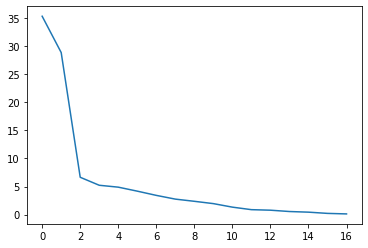

In [76]:
plt.plot(var_exp)
plt.savefig('Scree_Plot.jpg')

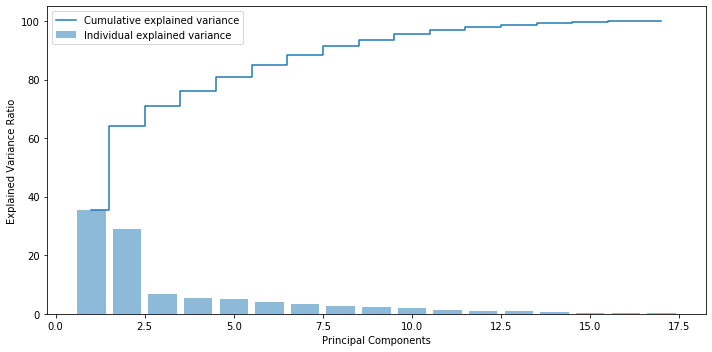

<Figure size 432x288 with 0 Axes>

In [77]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()
plt.savefig('Cum_Var.jpg')

# 14.Performing PCA and Exporting data to a table

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-0.71208375, -1.29094953, -2.24959712, ..., -0.34395816,
         4.86629301,  0.2393866 ],
       [-1.51316638, -1.72164446,  0.41850905, ..., -0.34018307,
         4.3341344 , -0.94839229],
       [ 0.09789722,  1.76634338, -0.50662245, ...,  0.31147591,
         1.3005576 , -1.35537772],
       [-0.69645528,  3.41659297,  0.78578426, ..., -0.03924609,
         1.37979412, -0.08237024],
       [ 0.27521132, -0.24422534, -0.35927567, ...,  0.70673177,
         0.03923504,  1.88510782]])

In [79]:
pca.components_

array([[ 0.36917956,  0.35987003,  0.3471535 ,  0.22165806,  0.2383526 ,
         0.33524751,  0.19641147,  0.1008881 ,  0.34459025,  0.12276907,
         0.08521784,  0.28736342,  0.27793031,  0.00134299,  0.02248706,
         0.18153653,  0.11059249],
       [-0.10311253, -0.14715991, -0.1995156 ,  0.29664466,  0.26132386,
        -0.22941716, -0.28831762,  0.36918928, -0.11115397, -0.02085682,
        -0.20863066,  0.15602929,  0.16193373, -0.31181119,  0.33207711,
         0.3268799 ,  0.27985807],
       [-0.07473231, -0.10177566, -0.07401725,  0.09952345,  0.07496791,
        -0.06307741, -0.03675739, -0.03277547, -0.07686358,  0.6926848 ,
         0.5438123 , -0.05312766, -0.03375099, -0.25652618, -0.09974844,
         0.17650639, -0.25362446],
       [ 0.21409511,  0.19830107,  0.13541958, -0.00897244, -0.05516991,
         0.08378749, -0.02715076,  0.16487002,  0.1347223 ,  0.00749776,
        -0.02742975, -0.55957407, -0.57102857, -0.32988379,  0.04891188,
         0.12131465

In [80]:
pca.explained_variance_ratio_

array([0.35321284, 0.2885612 , 0.06650359, 0.05228187, 0.04890922])

In [83]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([35.3, 64.2, 70.9, 76.1, 81. ])

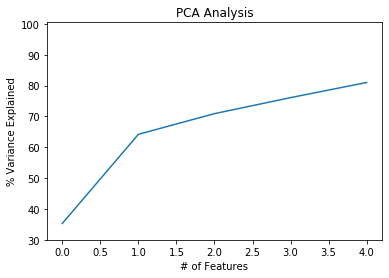

In [84]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [85]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.369180  0.359870  0.347153   0.221658   0.238353     0.335248   
1 -0.103113 -0.147160 -0.199516   0.296645   0.261324    -0.229417   
2 -0.074732 -0.101776 -0.074017   0.099523   0.074968    -0.063077   
3  0.214095  0.198301  0.135420  -0.008972  -0.055170     0.083787   
4  0.001686 -0.040378  0.004144   0.295710   0.377753    -0.006877   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.196411  0.100888    0.344590  0.122769  0.085218  0.287363  0.277930   
1    -0.288318  0.369189   -0.111154 -0.020857 -0.208631  0.156029  0.161934   
2    -0.036757 -0.032775   -0.076864  0.692685  0.543812 -0.053128 -0.033751   
3    -0.027151  0.164870    0.134722  0.007498 -0.027430 -0.559574 -0.571029   
4    -0.184682 -0.227130   -0.026847  0.337136 -0.056625 -0.126667 -0.172696   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   0.001343     0.022487  0.181537   0.110592  
1  -0.311811     0.332077  0.326880   0.279858  
2  -0.256526    -0.099748  0.176506  -0.253624  
3  -0.329884     0.048912  0.121315   0.272671  
4   0.492433     0.168893 -0.365672   0.338049

In [86]:
df_comp.T

0         1         2         3         4
Apps         0.369180 -0.103113 -0.074732  0.214095  0.001686
Accept       0.359870 -0.147160 -0.101776  0.198301 -0.040378
Enroll       0.347153 -0.199516 -0.074017  0.135420  0.004144
Top10perc    0.221658  0.296645  0.099523 -0.008972  0.295710
Top25perc    0.238353  0.261324  0.074968 -0.055170  0.377753
F.Undergrad  0.335248 -0.229417 -0.063077  0.083787 -0.006877
P.Undergrad  0.196411 -0.288318 -0.036757 -0.027151 -0.184682
Outstate     0.100888  0.369189 -0.032775  0.164870 -0.227130
Room.Board   0.344590 -0.111154 -0.076864  0.134722 -0.026847
Books        0.122769 -0.020857  0.692685  0.007498  0.337136
Personal     0.085218 -0.208631  0.543812 -0.027430 -0.056625
PhD          0.287363  0.156029 -0.053128 -0.559574 -0.126667
Terminal     0.277930  0.161934 -0.033751 -0.571029 -0.172696
S.F.Ratio    0.001343 -0.311811 -0.256526 -0.329884  0.492433
perc.alumni  0.022487  0.332077 -0.099748  0.048912  0.168893
Expend       0.181537  0.326880  0.176506  0.121315 -0.365672
Grad.Rate    0.110592  0.279858 -0.253624  0.272671  0.338049

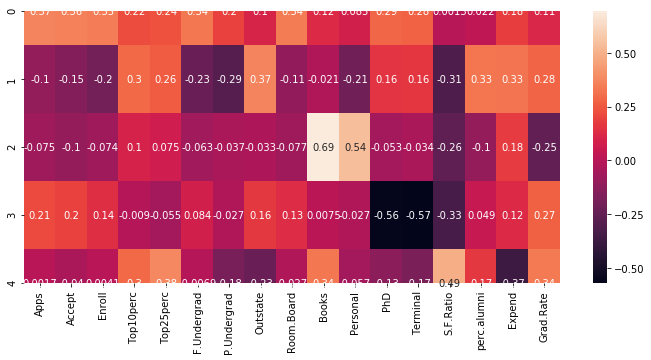

In [91]:
plt.figure(figsize=(12,5))
sns.heatmap(df_comp, annot = True)
plt.savefig('Correlation_betwee_PCA_and_Varables.jpg')

# 15.Explicit Form of PCA (in terms of Eigen Vectors)

In [97]:
data_new.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [92]:
eig_vecs[0] 

array([ 0.36917956,  0.10311253, -0.07473232,  0.21409518,  0.00168631,
       -0.01926099,  0.01910449, -0.04855583, -0.21081531, -0.05982322,
       -0.29310701, -0.16938075, -0.58968887,  0.14551802, -0.07163791,
       -0.51068154, -0.03311431])

In [100]:
# linear equation for 1st PCA in terms of eigen vectors:
# Apps(0.36917956) + Accept(0.10311253) + Enroll(-0.07473232) + Top10perc(0.21409518) + Top25perc(0.00168631) 
# + F.Undergrad(-0.01926099)  + P.Undergrad(0.01910449) + Outstate(-0.04855583) + Room.Board(-0.21081531) + Books(-0.05982322) 
# + Personal(-0.29310701) + PhD(-0.16938075) + Terminal(-0.58968887) + S.F.Ratio(0.14551802) + Perc.alumni(-0.07163791) 
# + Expend(-0.51068154) + Grad.Rate(-0.03311431)

In [93]:
eig_vecs[1] 

array([ 0.35987003,  0.14715991, -0.10177566,  0.19830098, -0.04037776,
       -0.03496955, -0.00631374, -0.06830485, -0.22078926, -0.05873827,
       -0.25538802,  0.37231841,  0.67680163,  0.18120671, -0.03820277,
       -0.20780939, -0.00383239])

In [99]:
# linear equation for 2nd PCA in terms of eigen vectors:
# Apps(0.35987003) +  Accept(0.14715991) + Enroll(-0.10177566) + Top10perc(0.19830098) + Top25perc(-0.04037776) 
# + F.Undergrad(-0.03496955) + P.Undergrad(-0.00631374) + Outstate(-0.06830485) + Room.Board(-0.22078926) + Books(-0.05873827) 
# + Personal(-0.25538802) + PhD(0.37231841) + Terminal(0.67680163) +  S.F.Ratio(0.18120671) + Perc.alumni(-0.03820277)  
# + Expend(-0.20780939) + Gradrate(-0.00383239)

In [94]:
eig_vecs[2] 

array([ 3.47153498e-01,  1.99515595e-01, -7.40172558e-02,  1.35419557e-01,
        4.14366663e-03,  5.85273919e-02, -4.45689613e-04, -1.41798915e-01,
       -1.28859428e-01, -1.14099459e-01, -7.57076423e-02, -6.98845631e-01,
        1.80428297e-01, -6.05199739e-02,  5.45393064e-02,  4.78922086e-01,
       -3.60133788e-03])

In [ ]:
# linear equation for 3rd PCA in terms of eigen vectors:
# Apps(3.47153498e-01) + Accept(1.99515595e-01) +  Enroll(-7.40172558e-02) +  Top10perc(1.35419557e-01) + Top25perc(4.14366663e-03)
# + F.Undregrad(5.85273919e-02) + P.Undergrad(-4.45689613e-04) + Outstate(-1.41798915e-01) + Room.Board(-1.28859428e-01) 
# + Books(-1.14099459e-01) + Personal(-7.57076423e-02) + PhD(-6.98845631e-01) + Terminal(1.80428297e-01) + S.F.Ratio(-6.05199739e-02)
# + Perc.alumni(5.45393064e-02) + Expend(4.78922086e-01) + Gradrate(-3.60133788e-03)

In [95]:
eig_vecs[3] 

array([ 0.22165806, -0.29664466,  0.09952345, -0.00897244,  0.29571019,
        0.3442107 ,  0.32532864,  0.01549103,  0.07150375,  0.06032861,
        0.00465585,  0.05328397,  0.02228206, -0.04585023, -0.06927764,
        0.04146998, -0.72121352])

In [101]:
# linear equation for 4th PCA in terms of eigen vectors:
# Apps(0.22165806) + Accept(-0.29664466) + Enroll(0.09952345) + Top10perc(-0.00897244) + Top25perc(0.29571019) + 
# F.Undergrad(0.3442107) + P.Undergrad(0.32532864) + Outstate(0.01549103) + Room.board(0.07150375) + Books(0.06032861) + 
# Personal(0.00465585) + PhD(0.05328397) + Terminal(0.02228206) + S.F.Ratio(-0.04585023) + Perc.alumni(-0.06927764) + 
# Expend(0.04146998) + Grad.Rate(-0.72121352)

In [96]:
eig_vecs[4] 

array([ 0.2383526 , -0.26132386,  0.07496791, -0.05516992,  0.37775348,
        0.35237055,  0.32038   ,  0.01763103,  0.15177766,  0.03045426,
        0.04545727, -0.0187691 ,  0.03167867,  0.17181146,  0.09471291,
       -0.04572966,  0.65456097])

In [ ]:
# linear equation for 5th PCA in terms of eigen vectors:
# Apps(0.2383526) + Accept(-0.26132386) + Enroll(0.07496791) + Top10perc(-0.05516992) + Top25perc(0.37775348) + 
# F.Undegrad(0.35237055) + P.Undergrad(0.32038) + Outstate(0.01763103) + Room.Board(0.15177766) + Books(0.03045426) +
# Personal(0.04545727) + PhD(-0.0187691) + Terminal(0.03167867) + S.F.Ratio(0.17181146) + Perc.alumni(0.09471291) + 
# Expend(-0.04572966) + Grad.Rate(0.65456097)